In [105]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from os import listdir
import os
from numpy import interp

In [106]:
base_path = 'data/830nm/Bastian'
helper_path = 'data/830nm/Bastian_helpers'
os.makedirs(helper_path, exist_ok=True)

shutter_speeds = []

def split(path):
    s = path.replace('.', '_')
    s = s.split('_')
    return s

image_names = listdir(base_path)
splits = list(map(split, image_names))

shutter_speeds = np.unique(np.array(splits)[:,1]).astype(int)
shutter_speeds = np.sort(shutter_speeds).astype(str)

In [107]:
median_images = []
subs = []

for shutter_speed in shutter_speeds:
    names = [name for name in image_names if shutter_speed in name]
    paths = [base_path + "/" + name for name in names]
    
    shutter_images = []
    for path in paths:
        gray = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
        shutter_images.append(gray)
    shutter_images = np.array(shutter_images)
    
    median_image = np.median(shutter_images, axis=0).astype('uint8')
    median_images.append(median_image)
    
    for shutter_image, name in zip(shutter_images, names):
        shutter_image = shutter_image.astype('int16')
        median_image = median_image.astype('int16')
        sub = (shutter_image-median_image)
        sub = interp(sub,[sub.min(),sub.max()],[0,255]).astype("uint8")
        cv2.imwrite(helper_path + "/" + "helper_" + name, sub)
        subs.append(sub)

#loop shutter speeds
    #get all images as tuble with names
    #crop images
    #find median
    #subtract median
    #map to 0-255
    #save with helper name

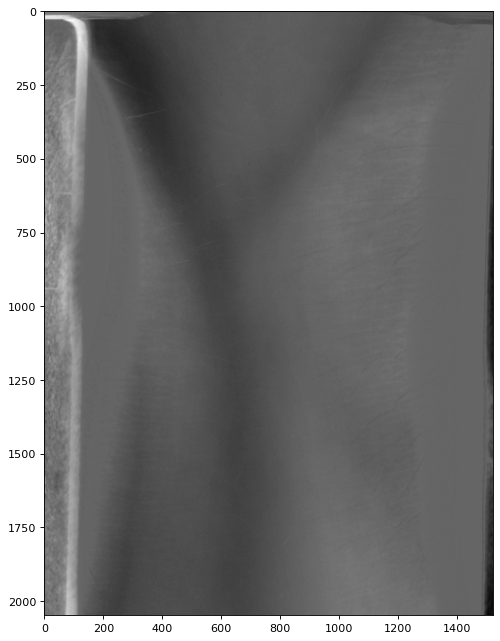

In [101]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(subs[840], cmap='gray')